# Tarea 1 Parte 2
Dada una imagen *f* en escala de grises:

## 1) Calcular los bordes usando la magnitud del gradiente. Obtener resultados para diferentes valores de umbral aplicando la magnitud del gradiente.

Para el caso 2D, el gradiente es el vector que se compone de las derivadas en cada dimensión, es el cambio que hay sobre las intensidades a lo largo de las columnas y las filas de la imagen. 
$$ \nabla f(x, y) = (f_x(x, y), f_y (x, y))  $$ 
con 
$$f'(x) = \frac{df(x)}{dx} = f_x (x).$$

Aproximaremos las primeras derivadas de la siguiente manera 
$$g_x (x, y) \approx f(x + 1, y) - f(x -1, y),$$ 
$$g_y (x, y) \approx f(x, y + 1) - f(x, y - 1) $$

Calcularemos dichas derivadas con una ventana de $3\times 3$ y aplicando una correlación con la imagen
$$g_x = f \otimes K_x$$
$$g_y = f \otimes K_y$$
donde
$$
K_x =
\begin{pmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{pmatrix}
\qquad
K_y =
\begin{pmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{pmatrix}
$$

Siendo estos Kernels de Sobel.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [2]:
def bordes(img, umbral):
    ##Dada la imagen f
    #1) Calculamos la magnituded del graidente para cada pixel
    height, width = img.shape
    k_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])
    
    k_y = np.array([[-1, -2, -1], 
                    [0, 0, 0], 
                    [1, 2, 1]])
    
    gx = np.zeros((height-2, width-2))
    gy = np.zeros((height-2, width-2))
    
    for i in range(1, height-1):
        for j in range(1, width-1):
            gx[i-1, j-1] = np.sum(img[i-1:i+2, j-1:j+2] * k_x)
            gy[i-1, j-1] = np.sum(img[i-1:i+2, j-1:j+2] * k_y)
    
            
    magnitud_gradiente = np.sqrt(gx**2 + gy**2)
    #vamos a normalizar la magnitud gradiente
    magnitud_gradiente = magnitud_gradiente / np.max(magnitud_gradiente) * 255
    
    #luego aplicaremos un umbral sobre la magnitud_gradiente
    magnitud_gradiente[magnitud_gradiente > umbral] = 255
    magnitud_gradiente[magnitud_gradiente <= umbral] = 0
    return magnitud_gradiente
    

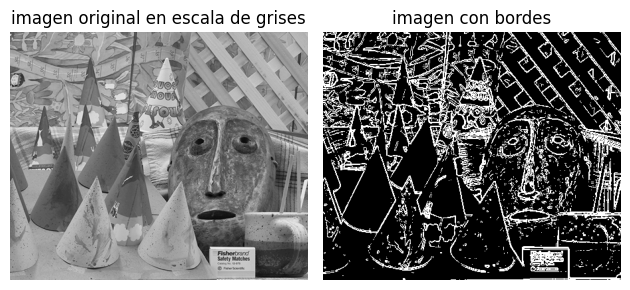

In [3]:
img = cv2.imread('im2.png', cv2.IMREAD_GRAYSCALE)
bordes_img = bordes(img, 40)
#imagen original
plt.subplot(1, 2, 1) #1 fila, 2 columnas, primera imagen
plt.imshow(img, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(1, 2, 2) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img, cmap='gray')
plt.title("imagen con bordes")
plt.axis('off')

plt.tight_layout()
plt.show()


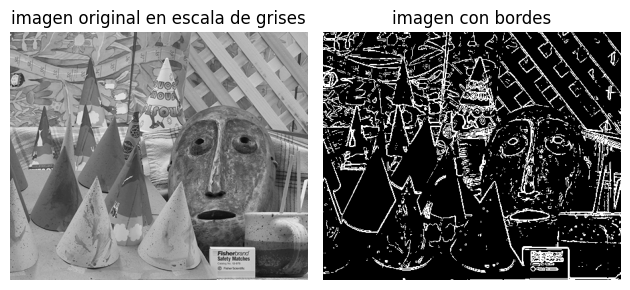

In [4]:

bordes_img2 = bordes(img, 50)
#imagen original
plt.subplot(1, 2, 1) #1 fila, 2 columnas, primera imagen
plt.imshow(img, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(1, 2, 2) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img2, cmap='gray')
plt.title("imagen con bordes")
plt.axis('off')

plt.tight_layout()
plt.show()

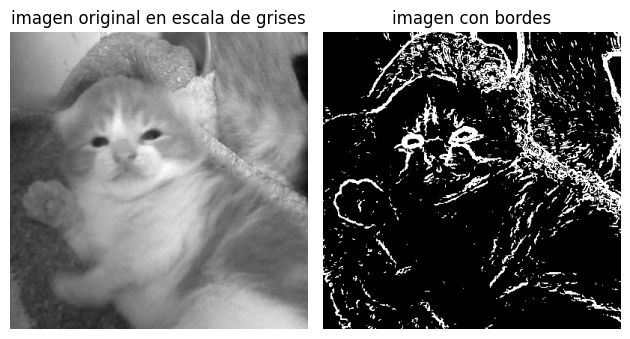

In [5]:
img2 = cv2.imread('gatitogordito.jpg', cv2.IMREAD_GRAYSCALE)
bordes_img22 = bordes(img2, 25)
#imagen original
plt.subplot(1, 2, 1) #1 fila, 2 columnas, primera imagen
plt.imshow(img2, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(1, 2, 2) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img22, cmap='gray')
plt.title("imagen con bordes")
plt.axis('off')

plt.tight_layout()
plt.show()


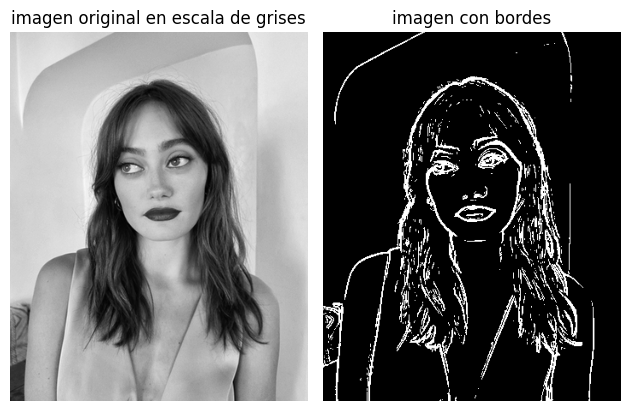

In [6]:
img3 = cv2.imread('ellapurnell.png', cv2.IMREAD_GRAYSCALE)
bordes_img3 = bordes(img3, 40)
#imagen original
plt.subplot(1, 2, 1) #1 fila, 2 columnas, primera imagen
plt.imshow(img3, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(1, 2, 2) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img3, cmap='gray')
plt.title("imagen con bordes")
plt.axis('off')

plt.tight_layout()
plt.show()


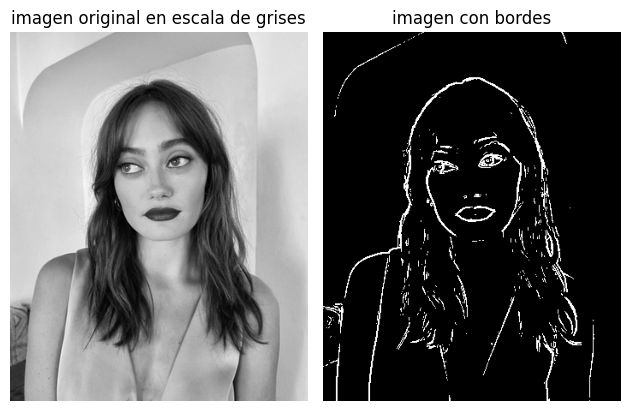

In [7]:
img3 = cv2.imread('ellapurnell.png', cv2.IMREAD_GRAYSCALE)
bordes_img32 = bordes(img3, 60)
#imagen original
plt.subplot(1, 2, 1) #1 fila, 2 columnas, primera imagen
plt.imshow(img3, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(1, 2, 2) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img32, cmap='gray')
plt.title("imagen con bordes")
plt.axis('off')

plt.tight_layout()
plt.show()


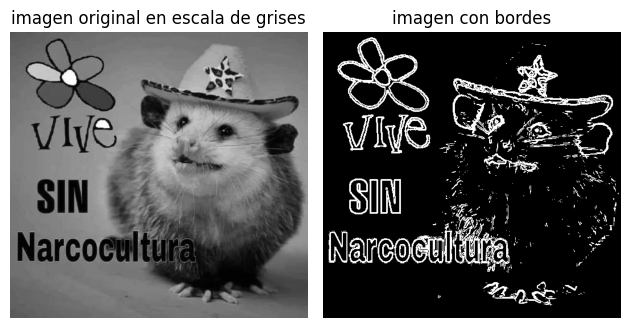

In [8]:
img4 = cv2.imread('vivesinnarcocultura.jpg', cv2.IMREAD_GRAYSCALE)
bordes_img4 = bordes(img4, 25)
#imagen original
plt.subplot(1, 2, 1) #1 fila, 2 columnas, primera imagen
plt.imshow(img4, cmap='gray')
plt.title("imagen original en escala de grises")
plt.axis('off')

#imagen con bordes
plt.subplot(1, 2, 2) #1 fila, 2 columnas, segunda imagen
plt.imshow(bordes_img4, cmap='gray')
plt.title("imagen con bordes")
plt.axis('off')

plt.tight_layout()
plt.show()


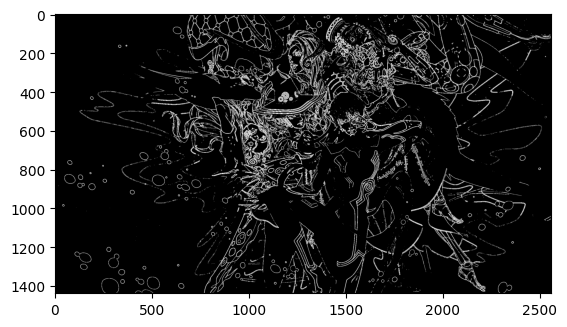

In [9]:
img5 = cv2.imread('nahobine.jpg', cv2.IMREAD_GRAYSCALE)
bordes_img5 = bordes(img5, 60)
plt.imshow(bordes_img5, cmap='gray')
plt.show()


## 2) Implementar el algoritmo del umbral adaptativo de Bradey & Rothpara para convertir la imagen *f* en una imagen binaria.

- **a.** Sin considerar la imagen integral.  
- **b.** Considerando la imagen integral.  
- **c.** Comparar tiempos de procesamiento entre las versiones a) y b).  
- **d.** Comparar el resultado con el algoritmo de Otsu (este algoritmo no es necesario implementarlo).


In [10]:
def umbral_adaptativo(img):
    height, width = img.shape
    img_out = np.zeros((height, width))
    for i in range(1, width - 1):
        suma = 0